### Table of Contents  

- Problema de regresion
- Gradient Descent
- Linear Regression in Numpy
- PyTorch
- Autograd
- Dynamic Computation Graph
- Optimizer
- Loss
- Model
- Dataset
- DataLoader
- Evaluation

## A Simple Regression Problem

La mayoria de los tutoriales comienza con un problema general de pytorch de cumputer vision, como deteccion de numeros en fotos o un simple modelo de clasificacion de imagenes pero creo que te distrae del objetivo principal: **¿cómo funciona PyTorch?**

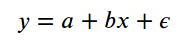

**Data Generation(generacion de datos)**

Comencemos a generar algunos datos sintéticos: comenzamos con un vector de 100 puntos para nuestra característica x y creamos nuestras etiquetas usando **a = 1** , **b = 2** .

A continuacion separaremos nuestros datos sinteticos en train y validacion para luego barajar el array y utilizaremos los primeros 80 puntos para el entramiento.

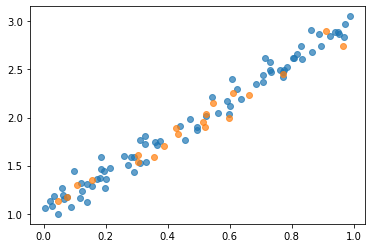

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# feature 
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
plt.scatter(x_train, y_train, alpha = 0.7)
plt.scatter(x_val, y_val,alpha = 0.7)

## Descenso de gradiente

4 steps para calcular el descenso del gradiente:
- **Step 1: Compute the Loss** (definir nuestra funcion de perdida)

Para un problema de regresión, la funcion de perdida está dada por el Error cuadratico Medio (MSE),es decir, el promedio de todas las diferencias al cuadrado entre etiquetas $(y)$ y predicciones $(a + bx)$ lo tipico en una regresion lineal.

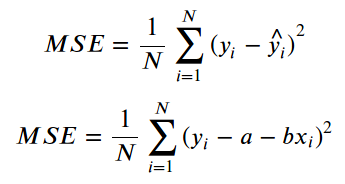
$$(Error Cuadratico Medio)$$
<br/><br/> 
  
- **Step 2: Compute the Gradients** (calcular gradientes)  
https://www.youtube.com/watch?v=GkB4vW16QHI   
Primero que es un gradiente?: un gradiente es un la union de las derivdas parciales en este caso tenemos 2 parametros(a y b) por lo que tendremos 2 devirdas parciales.  
Una derivada le dice cuánto cambia una cantidad dada cuando varía ligeramente alguna otra cantidad. En nuestro caso, **¿cuánto cambia nuestra pérdida de MSE cuando variamos cada uno de nuestros dos parámetros?**
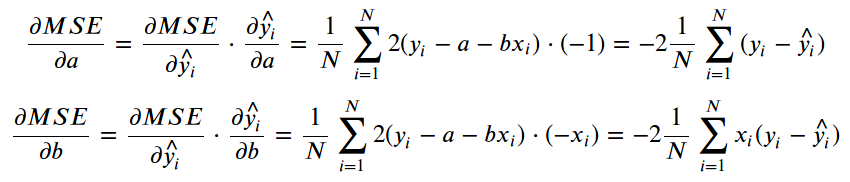
  $$ calculando Gradientes Con Respecto A (a y b) para ver en que medida varia la funcion de coste(MSE)$$
<br/><br/>  
   
- **Step 3: Update the Parameters**  
En el paso final, usamos los gradientes para actualizar los parámetros. Dado que estamos tratando de minimizar nuestras pérdidas, invertimos el signo del gradiente para la actualización.
Todavía hay otro parámetro a considerar: la tasa de aprendizaje,denotada por la letra griega eta(que se parece a la letra n),que es el factor multiplicativo que debemos aplicar al gradiente para la actualización del parámetro.
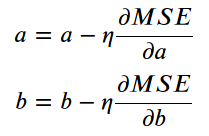
Actualización de los coeficientes a y b utilizando gradientes calculados y una tasa de aprendizaje   
<br/><br/> 
- **Step 4: Rinse and Repeat!**  
Ahora usamos los parámetros actualizados para volver al Paso 1 y reiniciar el proceso.
<br/><br/> 
Una **epoch**(epoca) se completa cuando cada punto ya se ha utilizado para calcular la pérdida. Una época es la misma que una actualización. Para el descenso del gradiente estocástico, una época significa N actualizaciones,mientras que para el mini-lote (de tamaño n), una época tiene N / n actualizaciones.
 **Repetir este proceso una y otra vez, durante muchas épocas es en pocas palabras, entrenar a un modelo.**

## Linear Regression in Numpy

Ahora vamos a utilizar lo anteriormente aprendido para coderarlo

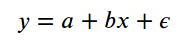

In [106]:
#inicializamos nuestros parametros/pesos de forma aleatoria
np.random.seed(42)   #semilla de aleatoriedad
a = np.random.randn(1)
b = np.random.randn(1)
print("Parametros de entrada: ")
print(a,b)

#definir el learnin rate:
lr = 0.1

#definir nuestro numero de epoch(epocas)
n_epochs = 1000

#bucle de entramiento
for epoch in range(n_epochs):
    
    #funcion lineal, calcular nuetra salida de nuestro modelo
    yhat = a + b*x_train
    
    #definir el error en nuestro modelo basdo en el MCE
    error = (y_train - yhat)
    #calcular el error cuadratico medio mean()
    loss = (error**2).mean()
    
    #calcular la gradiente para mis parametros(a y b) revisa foro step2
    grad_a = -2 * error.mean()
    grad_b = -2 *(error*x_train).mean()
    
    # actulizar los parametros utilizando el gradiente y el lr
    a = a - lr * grad_a
    b = b - lr * grad_b
print()
print('Post epoch de entramiento: ')
print(a,b)

Parametros de entrada: 
[0.49671415] [-0.1382643]

Post epoch de entramiento: 
[1.02354094] [1.96896411]


In [102]:
#equivalencia de una regrresion lineal simple con sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()#instanciar objeto modelo
model.fit(x_train,y_train)
print("Pos entrenamiento con sklearn: ")
print(model.intercept_, model.coef_[0])

Pos entrenamiento con sklearn: 
[1.02354075] [1.96896447]


Puedes revisar que tanto aciertas con tu data de validadcion, data que tu modelo no ha visto en su train

In [115]:
x_val*1.96896411+ 1.02354094

array([[1.62331452],
       [1.33068855],
       [2.32802354],
       [1.23597529],
       [2.81396018],
       [1.622583  ],
       [2.09999386],
       [2.54154765],
       [2.92483576],
       [2.20227801],
       [1.87402518],
       [2.04753621],
       [1.78883257],
       [1.17032848],
       [1.72597544],
       [2.03605009],
       [2.05278312],
       [1.11500014],
       [2.22825733],
       [1.86535386]])

In [116]:
y_val

array([[1.61525056],
       [1.3477003 ],
       [2.23410582],
       [1.29850118],
       [2.89383411],
       [1.53827918],
       [2.15210627],
       [2.45298292],
       [2.73938694],
       [1.99856008],
       [1.82467922],
       [1.89995094],
       [1.69902925],
       [1.17508957],
       [1.59042022],
       [1.94824115],
       [2.03775549],
       [1.13330591],
       [2.25331782],
       [1.88919723]])

# PyTorch

### escalar? matriz? tensor? en pytorch?

Bueno antes de comenzar con el codido que bueno tener un par de cosas claras, en Deep Learning es muy comun hablar de tensores en todo momento y bueno a veces es un poco confuso y ambiguo.
<br/><br/>
**En numpy** contamos con **Escaleres** (numeros) de dimension 0 , con **vectores** con dimensiones 1, **matrices** con 2 dimensiones y **tensores** que tienen de 3 a mas dimensiones
y bueno en numpy aplica esto.
<br/><br/>
En **pytorch** las cosas cambian un poco solo existen escalares y tensores, y esto como ? pues en pytorch un **vector** es un **tensor** y una **matriz** tambien es un **tensor**.

Algo que vi en algun articulo es que Pytorch se podria definir en una simple formula:
$$Pytorch = AutoGrad + GPU + Numpy$$
Ahora veremos que tan real es esto.
<br/><br/>
A menos que hayas trabajado en tecnologias muy exoticas, la gran cantidad de que procesos que has realizado en tu tiempo como programador lo mas probable es que se hayan ejecutado en **CPU** por que bueno es lo comun, una de las cosas que vuelve al Deep Learning un tecnologia tan potente de hace 20 anios es la capacidad de ejecucion en **GPU**.
<br/><br/>
Si has trabajo con numpy cuando calculas matrices ,vectores o tensores siempre han sido ejecutados en **CPU** y te preguntaras como hago para que mi solucion se ejecute en **GPU**, pues ahi es donde entra pytorch y sus tensores para hacerte la vida realmente facil que con una linea de codigo puede pasar tu tensor a la GPU.
<br/><br/>
Otro punto a tener en cuenta **pytorch** solo ejecuta sus tensores en **GPU** con valores **float**

In [128]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot #install libreria aparte !pip install torchviz

#una forma tipica de revisar si tu GPU esta disponible
print("GPU disponible ? :",torch.cuda.is_available())
device = 'cuda' if torch.cuda.is_available() else 'cpu' #si la GPU no esta dispoble se ejecuta todo en CPU

# si bien podemos crear tensores nuevos, tambien podemos migrar tensores de numpy y trasnformalos 
# en objetos tensores de pytorch con todos sus beneficios y tambien podemos definir un device ( GPU o CPU)
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print()
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

GPU disponible ? : True

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


CONTINUARA .............